In [ ]:
!pip install keras-tcn
!pip install keras-tcn --no-dependencies

     |████████████████████████████████| 706kB 5.3MB/s 


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

import keras 
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense 

from keras.layers import Dropout

from keras.layers import LSTM

from keras.layers import *


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

from functools import reduce


from tcn import TCN, tcn_full_summary

In [ ]:
composite=pd.read_csv("^IXIC.csv")
composite.drop(composite.tail(1).index,inplace=True)
nas_tech=pd.read_csv("^NDXT.csv")
nas_tech.drop(nas_tech.tail(1).index,inplace=True)
irrate=pd.read_csv("^TNX.csv")
irrate.dropna(inplace=True)
irrate.drop(irrate.tail(1).index,inplace=True)
composite.drop(['Open', 'High', 'Low','Adj Close', 'Volume'], axis=1, inplace=True)
composite.columns = ['Date', 'Comp_Close']
nas_tech.drop(['Open', 'High', 'Low','Adj Close', 'Volume'], axis=1, inplace=True)
nas_tech.columns = ['Date', 'NT_Close']
irrate.drop(['Open', 'High', 'Low','Adj Close', 'Volume'], axis=1, inplace=True)
irrate.columns = ['Date', 'IR_Close']

In [ ]:
composite.shape

(1503, 2)

# New Section

In [ ]:
dfa=pd.read_csv("AAPL.csv")


training_set = dfa.iloc[:1052, 4:5].values

test_set = dfa.iloc[1052:, 4:5].values
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 1052):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [ ]:
def merging(df):
  data_frames = [df, composite, nas_tech, irrate]
  df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='inner'), data_frames)
  
  return df_merged

In [ ]:
df_merged_a=merging(dfa) 

In [ ]:
dfb = pd.read_csv("FB.csv")

df_merged_b = merging(dfb)
df_merged_b

,Date,Open,High,Low,Close,Adj Close,Volume,Comp_Close,NT_Close,IR_Close
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500,4726.810059,2365.379883,2.123
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200,4652.569824,2327.110107,2.039
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300,4592.740234,2283.379883,1.963
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300,4650.470215,2300.439941,1.954
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000,4736.189941,2354.939941,2.016
...,...,...,...,...,...,...,...,...,...,...
1487,2020-12-14,273.369995,277.220001,271.559998,274.190002,274.190002,16376900,12440.040039,7327.029785,0.892
1488,2020-12-15,274.829987,276.079987,267.470001,275.549988,275.549988,23979500,12595.059570,7427.220215,0.923
1489,2020-12-16,274.760010,277.859985,272.510010,275.670013,275.670013,15885000,12658.190430,7468.640137,0.920
1490,2020-12-17,277.070007,280.440002,273.609985,274.480011,274.480011,16377800,12764.750000,7517.859863,0.930


In [ ]:
dft = pd.read_csv("TSLA.csv")
df_merged_t = merging(dft)

In [ ]:
df_merged_t

,Date,Open,High,Low,Close,Adj Close,Volume,Comp_Close,NT_Close,IR_Close
0,2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,4726.810059,2365.379883,2.123
1,2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,4652.569824,2327.110107,2.039
2,2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,4592.740234,2283.379883,1.963
3,2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,4650.470215,2300.439941,1.954
4,2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500,4736.189941,2354.939941,2.016
...,...,...,...,...,...,...,...,...,...,...
1487,2020-12-14,619.000000,642.750000,610.200012,639.830017,639.830017,52040600,12440.040039,7327.029785,0.892
1488,2020-12-15,643.280029,646.900024,623.799988,633.250000,633.250000,45223600,12595.059570,7427.220215,0.923
1489,2020-12-16,628.229980,632.500000,605.000000,622.770020,622.770020,42095800,12658.190430,7468.640137,0.920
1490,2020-12-17,628.190002,658.820007,619.500000,655.900024,655.900024,56270100,12764.750000,7517.859863,0.930


APPLE

In [ ]:
training_set = df_merged_a.iloc[:1052, 1:].values

test_set = df_merged_a.iloc[1052:, 1:].values
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

sc_predict = MinMaxScaler(feature_range = (0, 1))
sc_predict.fit_transform(training_set[:, 3].reshape(-1,1))

array([[0.13398718],
       [0.11225572],
       [0.1123263 ],
       ...,
       [0.67579194],
       [0.68919777],
       [0.67868479]])

In [ ]:
# Creating a data structure with 90 time-steps and 1 output
X_train90 = []
y_train90 = []
for i in range(90, 1052):
    X_train90.append(training_set_scaled[i-90:i, ])

for i in range(90, 1052):
    y_train90.append(training_set_scaled[i, 3])
X_train90, y_train90 = np.array(X_train90), np.array(y_train90)
X_train90 = np.reshape(X_train90, (X_train90.shape[0], X_train90.shape[1], 9))
X_train90.shape

(962, 90, 9)

In [ ]:
y_train90.shape

(962,)

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df_merged_a.iloc[:1052, 1:]
dataset_test = df_merged_a.iloc[1052:, 1:]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values


inputs.shape

(530, 9)

In [ ]:
inputs = inputs.reshape(-1,9)
inputs = sc.transform(inputs)
len(inputs)

530

In [ ]:
X_test90 = []
for i in range(90, 530):
    X_test90.append(inputs[i-90:i, ])
X_test90 = np.array(X_test90)
X_test90 = np.reshape(X_test90, (X_test90.shape[0], X_test90.shape[1], 9))
print(X_test90.shape)

(440, 90, 9)


TCN Model

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
31/31 [==============================] - 5s 83ms/step - loss: 9.5951
Epoch 2/100
31/31 [==============================] - 3s 81ms/step - loss: 0.2727
Epoch 3/100
31/31 [==============================] - 3s 83ms/step - loss: 0.1906
Epoch 4/100
31/31 [==============================] - 3s 82ms/step - loss: 0.1233
Epoch 5/100
31/31 [==============================] - 3s 82ms/step - loss: 0.1040
Epoch 6/100
31/31 [==============================] - 3s 81ms/step - loss: 0.0961
Epoch 7/100
31/31 [==============================] - 3s 82ms/step - loss: 0.0589
Epoch 8/100
31/31 [==============================] - 3s 82ms/step - loss: 0.0557
Epoch 9/100
31/31 [==============================] - 3s 82ms/step - loss: 0.0471
Epoch 10/100
31/31 [==============================] - 3s 83ms/step - loss: 0.0426
Epoch 11/100
31/31 [==============================] - 3s 83ms/step - loss: 0.0395
Epoch 12/100
31/31 [==============================] - 3s 82ms/step - loss: 0.0380
Epoch 13/100
31/31 [=====

In [ ]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc_predict.inverse_transform(predicted_stock_price)

y =  dataset_test['Close'].values.reshape(440,) 
x = df_merged_a.loc[1052: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(df_merged_a.loc[1052:, "Date"],predicted_stock_price, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,440,50))
plt.title('Multivariate APPLE Stock Price Prediction - TCN')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show()

ValueError: ignored

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

GRU MODEL

In [ ]:
model = Sequential()
model.add(GRU(units = 300 , input_shape = (X_train90.shape[1], 9))) 
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 30, batch_size = 32)

Epoch 1/30
31/31 [==============================] - 9s 253ms/step - loss: 0.0590
Epoch 2/30
31/31 [==============================] - 8s 274ms/step - loss: 0.0033
Epoch 3/30
31/31 [==============================] - 8s 257ms/step - loss: 0.0016
Epoch 4/30
31/31 [==============================] - 8s 253ms/step - loss: 0.0014
Epoch 5/30
31/31 [==============================] - 8s 255ms/step - loss: 0.0011
Epoch 6/30
31/31 [==============================] - 8s 254ms/step - loss: 0.0010
Epoch 7/30
31/31 [==============================] - 8s 259ms/step - loss: 0.0010
Epoch 8/30
31/31 [==============================] - 8s 251ms/step - loss: 9.4172e-04
Epoch 9/30
31/31 [==============================] - 8s 249ms/step - loss: 7.7770e-04
Epoch 10/30
31/31 [==============================] - 8s 245ms/step - loss: 8.5061e-04
Epoch 11/30
31/31 [==============================] - 8s 254ms/step - loss: 8.8599e-04
Epoch 12/30
31/31 [==============================] - 8s 258ms/step - loss: 9.5131e-04
Epoch

In [ ]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc_predict.inverse_transform(predicted_stock_price)

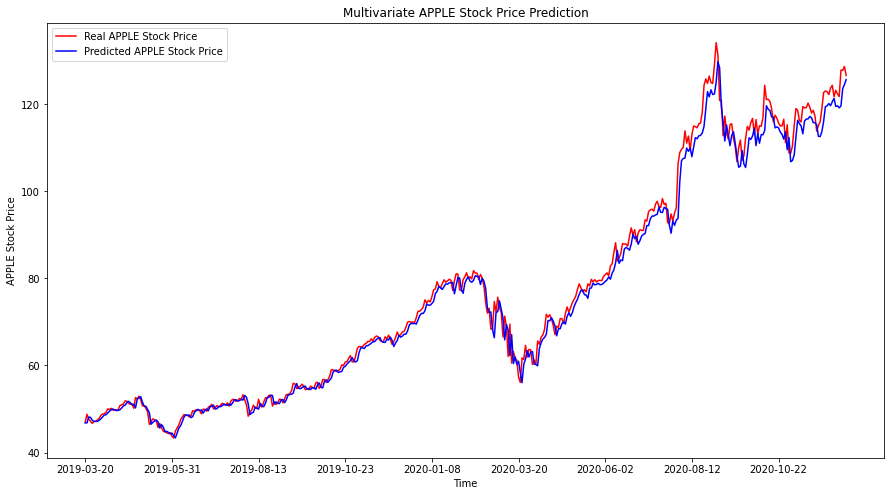

In [ ]:
y =  dataset_test['Close'].values.reshape(440,) 
x = df_merged_a.loc[1052: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(df_merged_a.loc[1052:, "Date"],predicted_stock_price, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,440,50))
plt.title('Multivariate APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show()

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

1.7128378251803311 2.504616207892658


FB

In [ ]:
training_set = df_merged_b.iloc[:1052, 1:].values

test_set = df_merged_b.iloc[1052:, 1:].values
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

sc_predict = MinMaxScaler(feature_range = (0, 1))
sc_predict.fit_transform(training_set[:, 3].reshape(-1,1))

array([[0.03067267],
       [0.02188915],
       [0.01463924],
       ...,
       [0.64085044],
       [0.60243987],
       [0.61010809]])

In [ ]:
# Creating a data structure with 90 time-steps and 1 output
X_train90 = []
y_train90 = []
for i in range(90, 1052):
    X_train90.append(training_set_scaled[i-90:i, ])

for i in range(90, 1052):
    y_train90.append(training_set_scaled[i, 3])
X_train90, y_train90 = np.array(X_train90), np.array(y_train90)
X_train90 = np.reshape(X_train90, (X_train90.shape[0], X_train90.shape[1], 9))
X_train90.shape

(962, 90, 9)

In [ ]:

dataset_train = df_merged_b.iloc[:1052, 1:]
dataset_test = df_merged_b.iloc[1052:, 1:]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values


inputs.shape

(530, 9)

In [ ]:
inputs = inputs.reshape(-1,9)
inputs = sc.transform(inputs)
len(inputs)

530

In [ ]:
X_test90 = []
for i in range(90, 530):
    X_test90.append(inputs[i-90:i, ])
X_test90 = np.array(X_test90)
X_test90 = np.reshape(X_test90, (X_test90.shape[0], X_test90.shape[1], 9))
print(X_test90.shape)

(440, 90, 9)


In [ ]:
model = Sequential()
model.add(GRU(units = 300 , input_shape = (X_train90.shape[1], 9))) 
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 30, batch_size = 32)

Epoch 1/30
31/31 [==============================] - 9s 241ms/step - loss: 0.0791
Epoch 2/30
31/31 [==============================] - 8s 244ms/step - loss: 0.0031
Epoch 3/30
31/31 [==============================] - 8s 252ms/step - loss: 0.0017
Epoch 4/30
31/31 [==============================] - 8s 250ms/step - loss: 0.0016
Epoch 5/30
31/31 [==============================] - 7s 240ms/step - loss: 0.0015
Epoch 6/30
31/31 [==============================] - 8s 243ms/step - loss: 0.0013
Epoch 7/30
31/31 [==============================] - 7s 241ms/step - loss: 0.0014
Epoch 8/30
31/31 [==============================] - 7s 240ms/step - loss: 0.0014
Epoch 9/30
31/31 [==============================] - 8s 241ms/step - loss: 0.0012
Epoch 10/30
31/31 [==============================] - 7s 241ms/step - loss: 9.2656e-04
Epoch 11/30
31/31 [==============================] - 7s 241ms/step - loss: 9.1373e-04
Epoch 12/30
31/31 [==============================] - 8s 243ms/step - loss: 0.0011
Epoch 13/30
31/31

In [ ]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc_predict.inverse_transform(predicted_stock_price)

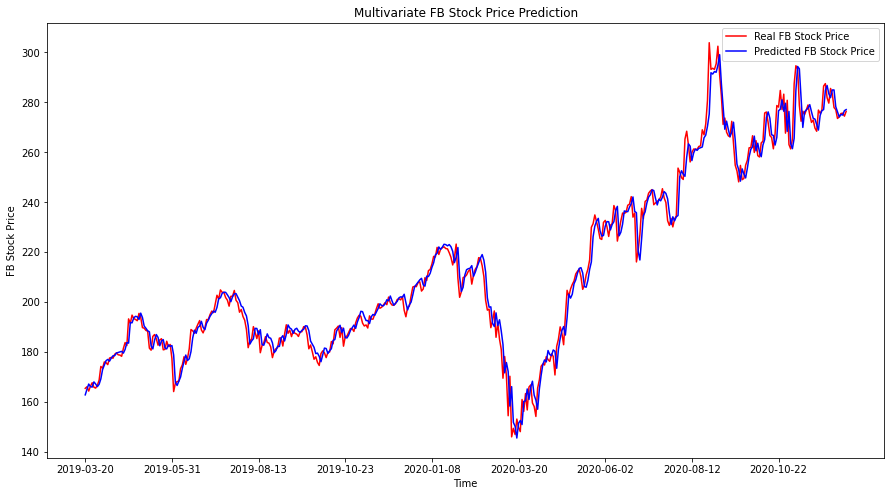

In [ ]:
y =  dataset_test['Close'].values.reshape(440,) 
x = df_merged_b.loc[1052: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(df_merged_b.loc[1052:, "Date"],predicted_stock_price, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,440,50))
plt.title('Multivariate FB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show()

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

3.4894014217418317 5.0883588419567225


TESLA

In [ ]:
training_set = df_merged_t.iloc[:881, 1:].values

test_set = df_merged_t.iloc[881:, 1:].values
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

sc_predict = MinMaxScaler(feature_range = (0, 1))
sc_predict.fit_transform(training_set[:, 3].reshape(-1,1))

array([[0.47851495],
       [0.49098743],
       [0.505449  ],
       [0.49504824],
       [0.50971697],
       [0.54278373],
       [0.5742759 ],
       [0.51008993],
       [0.51464802],
       [0.5118717 ],
       [0.50445451],
       [0.45307259],
       [0.50200973],
       [0.497866  ],
       [0.51017284],
       [0.50752083],
       [0.48199564],
       [0.50805953],
       [0.52401279],
       [0.42456393],
       [0.40956366],
       [0.40388683],
       [0.38826502],
       [0.39157999],
       [0.40956366],
       [0.41221567],
       [0.46127712],
       [0.48502054],
       [0.46235444],
       [0.40819628],
       [0.36091658],
       [0.31160649],
       [0.31641325],
       [0.33634442],
       [0.41155266],
       [0.43430157],
       [0.43670494],
       [0.39348615],
       [0.43102802],
       [0.42224337],
       [0.40716037],
       [0.43301702],
       [0.4360834 ],
       [0.43430157],
       [0.44159451],
       [0.45381843],
       [0.45539306],
       [0.491

In [ ]:
# Creating a data structure with 90 time-steps and 1 output
X_train90 = []
y_train90 = []
for i in range(90, 881):
    X_train90.append(training_set_scaled[i-90:i, ])

for i in range(90, 881):
    y_train90.append(training_set_scaled[i, 3])
X_train90, y_train90 = np.array(X_train90), np.array(y_train90)
X_train90 = np.reshape(X_train90, (X_train90.shape[0], X_train90.shape[1], 9))
X_train90.shape

(791, 90, 9)

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df_merged_t.iloc[:881, 1:]
dataset_test = df_merged_t.iloc[881:, 1:]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values


inputs.shape

(458, 9)

In [ ]:
inputs = inputs.reshape(-1,9)
inputs = sc.transform(inputs)
len(inputs)

458

In [ ]:
X_test90 = []
for i in range(90, 458):
    X_test90.append(inputs[i-90:i, ])
X_test90 = np.array(X_test90)
X_test90 = np.reshape(X_test90, (X_test90.shape[0], X_test90.shape[1], 9))
print(X_test90.shape)

(368, 90, 9)


In [ ]:
model = Sequential()
model.add(GRU(units = 300 , input_shape = (X_train90.shape[1], 9))) 
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 30, batch_size = 32)

Epoch 1/30
25/25 [==============================] - 8s 254ms/step - loss: 0.1254
Epoch 2/30
25/25 [==============================] - 6s 246ms/step - loss: 0.0052
Epoch 3/30
25/25 [==============================] - 6s 242ms/step - loss: 0.0038
Epoch 4/30
25/25 [==============================] - 6s 243ms/step - loss: 0.0026
Epoch 5/30
25/25 [==============================] - 6s 241ms/step - loss: 0.0027
Epoch 6/30
25/25 [==============================] - 6s 238ms/step - loss: 0.0028
Epoch 7/30
25/25 [==============================] - 6s 242ms/step - loss: 0.0026
Epoch 8/30
25/25 [==============================] - 6s 246ms/step - loss: 0.0022
Epoch 9/30
25/25 [==============================] - 6s 241ms/step - loss: 0.0022
Epoch 10/30
25/25 [==============================] - 6s 241ms/step - loss: 0.0024
Epoch 11/30
25/25 [==============================] - 6s 242ms/step - loss: 0.0022
Epoch 12/30
25/25 [==============================] - 6s 241ms/step - loss: 0.0024
Epoch 13/30
25/25 [======

In [ ]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc_predict.inverse_transform(predicted_stock_price)

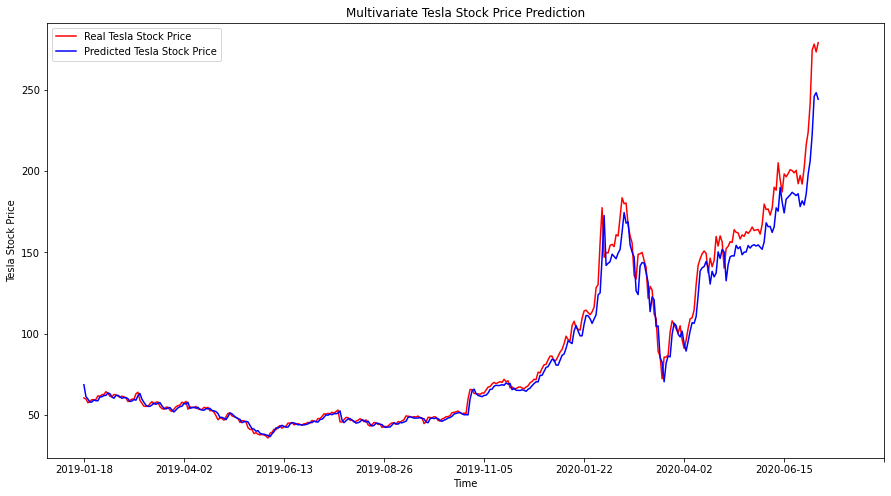

In [ ]:
y =  dataset_test['Close'].values.reshape(368,) 
x = df_merged_t.loc[881: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Tesla Stock Price")
plt.plot(df_merged_t.loc[881:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Tesla Stock Price")
plt.xticks(np.arange(0,440,50))
plt.title('Multivariate Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

4.903429802509473 8.582997648448595
